This script is used to test the modules.

In [2]:
%matplotlib inline

import sys
sys.path.append("../")
import numpy as np
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import os
import meta.statistics as sttt

*********************** extract variables *************************
(36, 12, 95)
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!


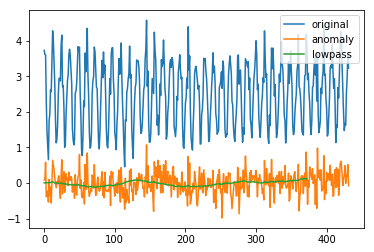

In [3]:
if __name__=="__main__":
    # sample
    ################################   Input zone  ######################################
    # specify data path
    datapath_ERAI = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ERAI/postprocessing'
    datapath_ORAS4 = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ORAS4/postprocessing'
    datapath_ERAI_fields = '/home/yang/workbench/Core_Database_AMET_OMET_reanalysis/ERAI/regression'
    #####################################################################################
    print ('*********************** extract variables *************************')
    dataset_ERAI_fields_SIC_SST_SLP = Dataset(os.path.join(datapath_ERAI_fields,'surface_ERAI_monthly_regress_1979_2016.nc'))
    dataset_ERAI_AMET = Dataset(os.path.join(datapath_ERAI,'model_daily_075_1979_2016_E_zonal_int.nc'))
    dataset_ORAS4_OMET = Dataset(os.path.join(datapath_ORAS4,'oras4_model_monthly_orca1_E_zonal_int.nc'))
    # extract time series from 1979 to 2014
    # from 20N - 90N
    AMET_reverse = dataset_ERAI_AMET.variables['E'][:-2,:,:]/1000 # from Tera Watt to Peta Watt
    OMET = dataset_ORAS4_OMET.variables['E'][21:,:,180:]/1000 # from Tera Watt to Peta Watt # start from 1979
    #SST_ERAI_series = dataset_ERAI_fields_SIC_SST_SLP.variables['sst'][:]
    year = dataset_ORAS4_OMET.variables['year'][21:]    # from 1979 to 2014
    month = dataset_ORAS4_OMET.variables['month'][:]
    latitude_OMET = dataset_ORAS4_OMET.variables['latitude_aux'][180:]
    latitude_AMET_reverse = dataset_ERAI_AMET.variables['latitude'][:]
    # since OMET is from 20N - 90N, AMET is from 90N to 20N, we have to reverse it
    # for interpolation, x should be monotonically increasing
    latitude_AMET = latitude_AMET_reverse[::-1]
    AMET = AMET_reverse[:,:,::-1]
    print (AMET.shape)
    #####################   postprocess with statistical tool   #########################
    instance = sttt.operator(AMET[:,:,54])
    instance.anomaly()
    instance.lowpass()
    plt.plot(AMET[:,:,54].reshape(len(year)*12), label='original')
    plt.plot(instance._anomaly, label='anomaly')
    plt.plot(instance._lowpass, label='lowpass')
    plt.legend()
    
